<a href="https://colab.research.google.com/github/rohingarg/World-Regional-Happiness/blob/main/World_Regional_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#World Happiness Report Data downloaded from Kaggle

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats
import scipy.optimize
import scipy.spatial
from sklearn.utils import resample


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DATA201/vehicles.csv')

In [ ]:
df.head()
df.describe()

,id,price,year,odometer,county,lat,long
count,4.238570e+05,4.238570e+05,328743.000000,2.705850e+05,0.0,324404.000000,324404.000000
mean,7.190602e+09,5.779437e+04,2009.827358,9.942578e+04,NaN,38.731429,-93.949367
std,5.159269e+06,1.002581e+07,10.135809,1.204833e+05,NaN,5.902977,17.930566
min,7.178302e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-80.386400,-161.394000
25%,7.186688e+09,4.499000e+03,2007.000000,4.432400e+04,NaN,35.054500,-106.678000
50%,7.192068e+09,9.995000e+03,2012.000000,9.174900e+04,NaN,39.366900,-88.009900
75%,7.194909e+09,1.899500e+04,2016.000000,1.372370e+05,NaN,42.517075,-80.832500
max,7.197006e+09,3.808256e+09,2021.000000,1.000000e+07,NaN,80.383400,115.524000


In [ ]:
df.shape

(423857, 25)

In [ ]:
#checking for missing data -> there is no missing data
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year             95114
manufacturer    110615
model            98473
condition       247138
cylinders       226178
fuel             96643
odometer        153272
title_status     96098
transmission     95792
vin             239437
drive           192738
size            321230
type            182700
paint_color     201654
image_url        94196
description      94203
county          423857
state                0
lat              99453
long             99453
dtype: int64

In [ ]:
# Don't need all of the columns
del df['Dystopia + residual']
del df['Explained by: Freedom to make life choices']
del df['Explained by: Generosity']
del df['Explained by: Healthy life expectancy']
del df['Explained by: Log GDP per capita']
del df['Explained by: Perceptions of corruption']
del df['Explained by: Social support']
del df['Ladder score in Dystopia']

In [ ]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [ ]:
#Group by region and display averages for each region

In [ ]:
region = df.groupby(['Regional indicator']).mean()
region.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Regional indicator,,,,,,,,,,
Central and Eastern Europe,5.883818,0.043896,5.969854,5.797781,9.975703,0.874566,68.148988,0.770271,-0.102712,0.850859
Commonwealth of Independent States,5.358342,0.042306,5.441262,5.275421,9.207234,0.856729,64.726558,0.784004,-0.041285,0.746387
East Asia,5.714850,0.039475,5.792221,5.637479,10.316895,0.859852,71.094847,0.761027,-0.051978,0.702266
Latin America and Caribbean,5.981786,0.063247,6.105750,5.857821,9.303024,0.856891,66.717328,0.830684,-0.071901,0.801526
Middle East and North Africa,5.227159,0.053364,5.331752,5.122566,9.713648,0.796720,65.313611,0.710171,-0.084426,0.761510


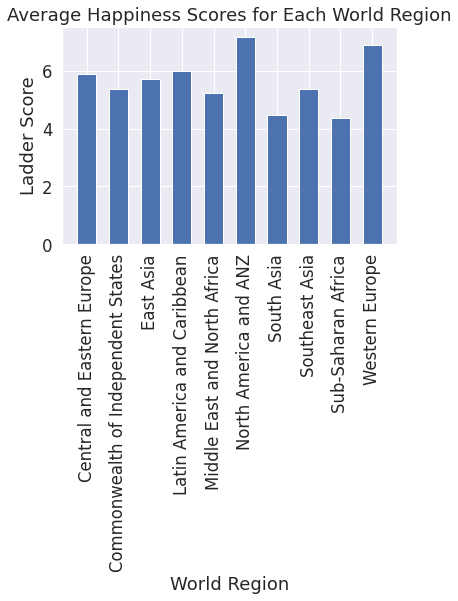

In [ ]:
#First Graph: Average happiness level of each world region
plt.bar(region.index, region['Ladder score'], width = 0.6)
plt.xticks(rotation = 90)
plt.title('Average Happiness Scores for Each World Region')
plt.ylabel('Ladder Score')
plt.xlabel('World Region')
plt.show()

Text(0.5, 1.0, 'Regions vs. Happiness Score: Countries as Points')

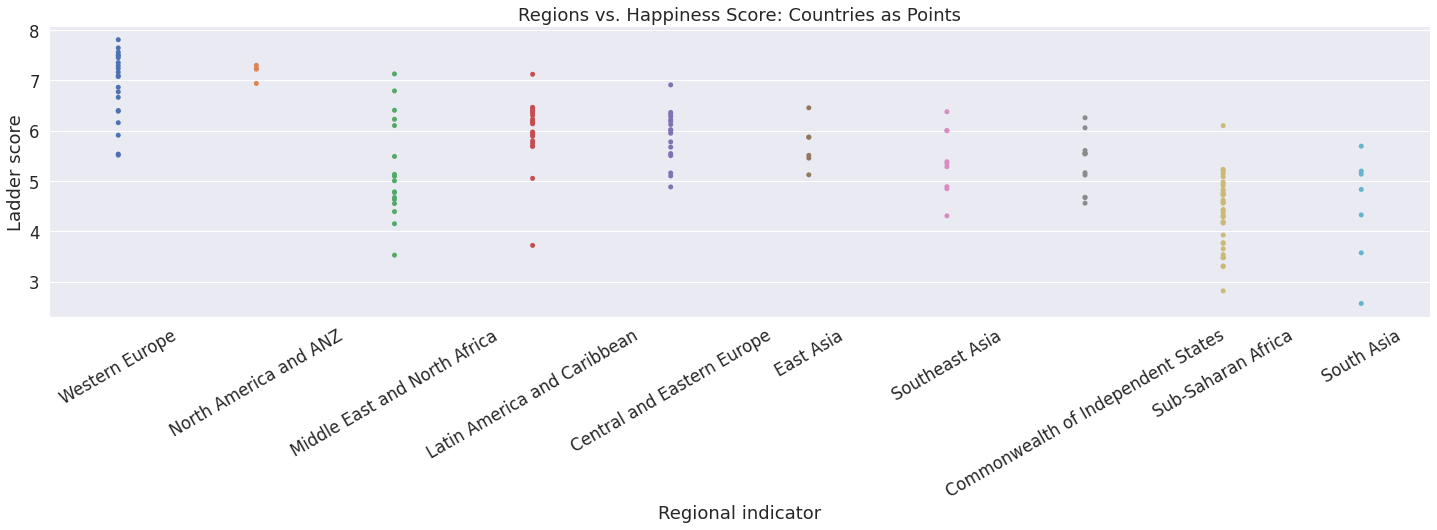

In [ ]:
countryregion = sns.catplot(x='Regional indicator', y = 'Ladder score', jitter = False, data=df, height = 5, aspect = 4)
countryregion.set_xticklabels(rotation = 30)
plt.title('Regions vs. Happiness Score: Countries as Points')

Text(0.5, 1.0, 'Happiness Score by Region in Box Plots')

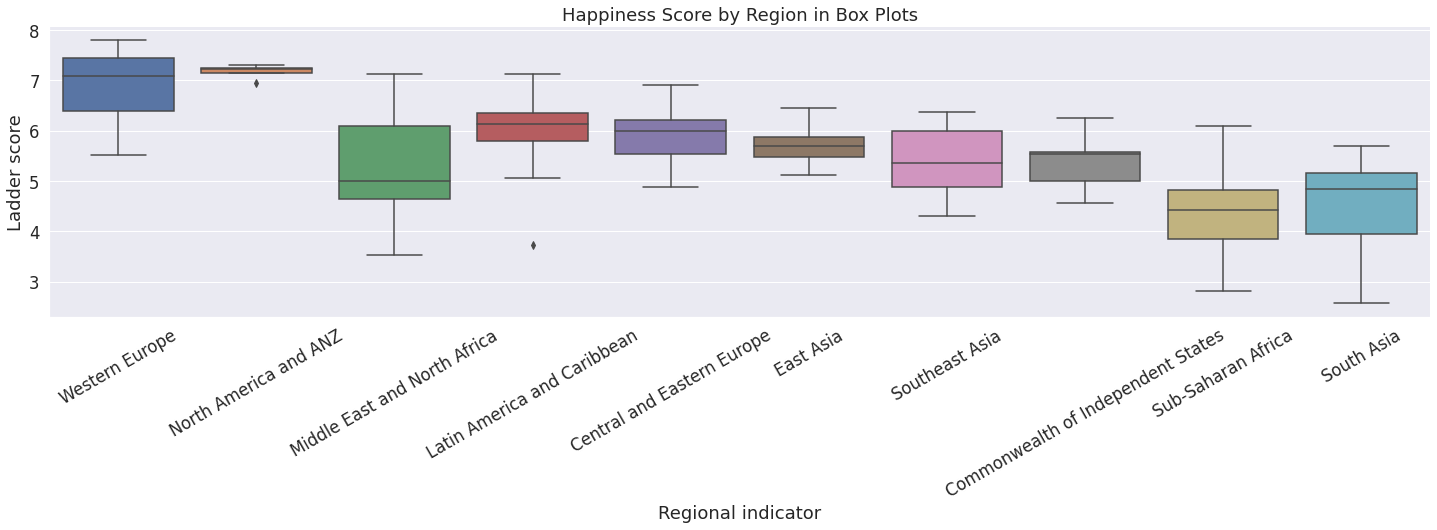

In [ ]:
crbox = sns.catplot(x='Regional indicator', y = 'Ladder score', data = df,kind = 'box', height = 5, aspect = 4)
crbox.set_xticklabels(rotation = 30)
plt.title('Happiness Score by Region in Box Plots')

In [ ]:
#Graphing different variables that could affect the happiness score on the x axis and the happiness ladder score on the y axis

Text(0.5, 1.0, 'Social Support vs Happiness Score: Colored by Region')

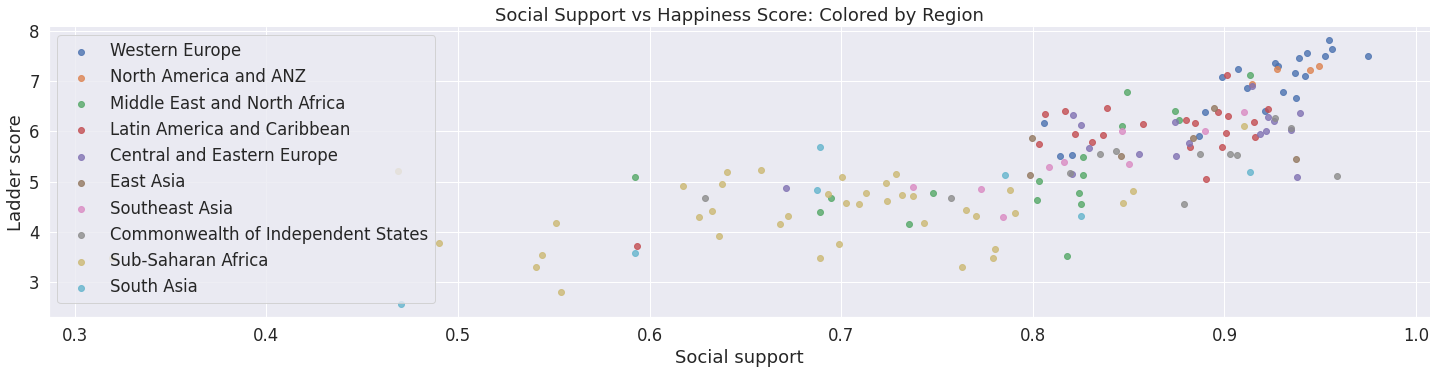

In [ ]:
#It looks like there is somewhat of a positive relationship between social support and the happiness score
sns.lmplot(x= 'Social support', y = 'Ladder score', data = df, fit_reg = False, hue = 'Regional indicator', legend = False, height = 5, aspect = 4)
plt.legend(loc= 'upper left')
plt.title('Social Support vs Happiness Score: Colored by Region')

Text(0.5, 1.0, 'Healthy life expectancy vs. Happiness Score: Colored by Region')

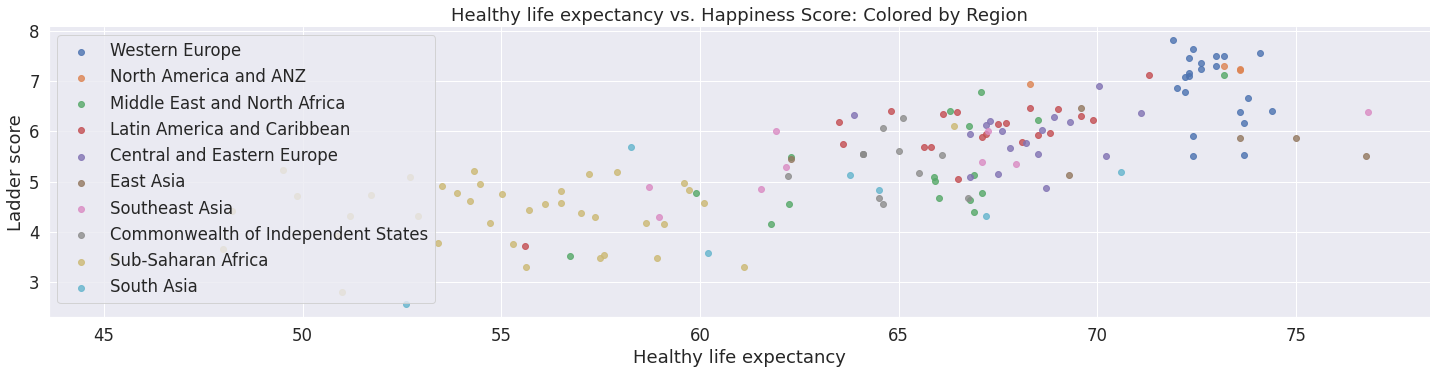

In [ ]:
#Also a postive relationship between healthy life expectancy and happiness score
sns.lmplot(x='Healthy life expectancy', y = 'Ladder score', data = df, fit_reg = False, hue = 'Regional indicator', legend = False, height = 5, aspect = 4)
plt.legend(loc = 'upper left')
plt.title('Healthy life expectancy vs. Happiness Score: Colored by Region')

Text(0.5, 1.0, 'Freedom vs. Happiness Score: Colored by Region')

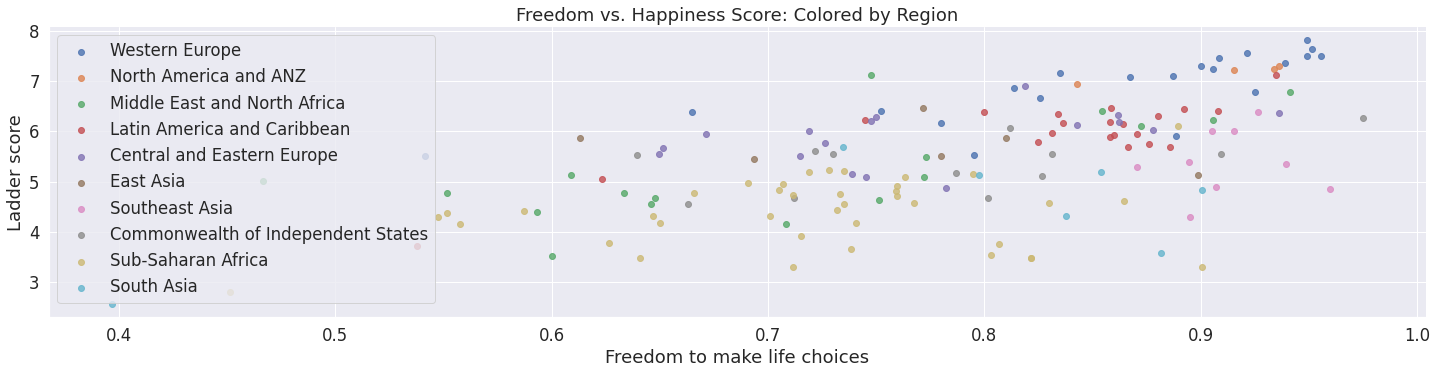

In [ ]:
#Also a positive relationship between freedom and happiness score
sns.lmplot(x='Freedom to make life choices', y = 'Ladder score', data = df, fit_reg = False, hue = 'Regional indicator', legend = False, height = 5, aspect = 4)
plt.legend(loc = 'upper left')
plt.title('Freedom vs. Happiness Score: Colored by Region')

Text(0.5, 1.0, 'Perceptions of corruption vs. Happiness Score: Colored by Region')

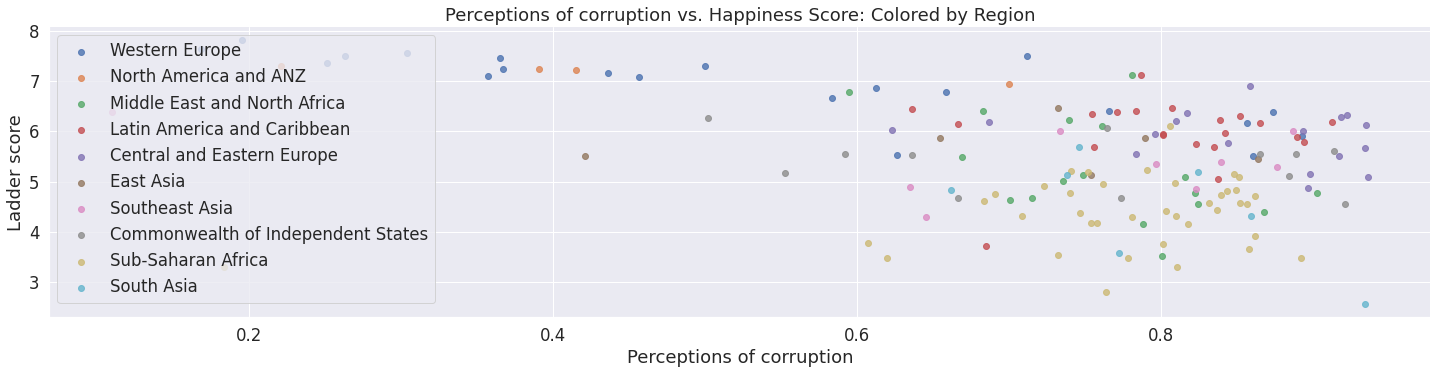

In [ ]:
#Looks like a weak negative correlation between perceptions of corruption and ladder score/No correlation
sns.lmplot(x='Perceptions of corruption', y = 'Ladder score', data = df, fit_reg = False, hue = 'Regional indicator', legend = False, height = 5, aspect = 4)
plt.legend(loc = 'upper left')
plt.title('Perceptions of corruption vs. Happiness Score: Colored by Region')

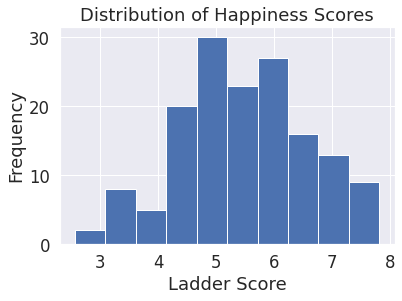

In [ ]:
# Taking a quick look at the distribution of the "Ladder score" variable
fig, ax = plt.subplots()
ax.hist(df["Ladder score"])
ax.set_title("Distribution of Happiness Scores")
ax.set_xlabel("Ladder Score")
ax.set_ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Happiness Score')

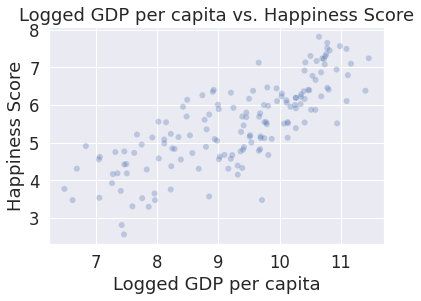

In [ ]:
# Does money buy happiness? Looks like there is a relatively strong relationship between GDP per capita and happiness.
fig, ax = plt.subplots()
ax.scatter(df["Logged GDP per capita"], df["Ladder score"], alpha=0.3, edgecolors='none')
ax.set_title("Logged GDP per capita vs. Happiness Score")
ax.set_xlabel("Logged GDP per capita")
ax.set_ylabel("Happiness Score")

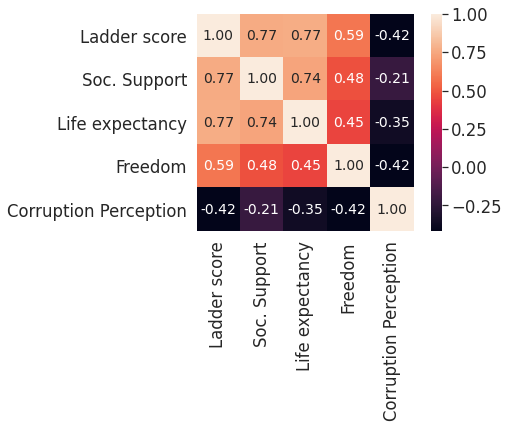

In [ ]:
# Looking at correlation between various numerical variables
df_numeric = df[['Ladder score', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']]
column_names = ['Ladder score', 'Soc. Support', "Life expectancy", "Freedom", "Corruption Perception"]
corr_coef = np.corrcoef(df_numeric.values.T)
sns.set(font_scale=1.5)
heat_map = sns.heatmap(corr_coef,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':14},
                yticklabels=column_names,
                xticklabels=column_names)


In [ ]:
 #bootstrapping

 #describe Ladder score variable, including mean, using simple python method:
 df['Ladder score'].describe()

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: Ladder score, dtype: float64

In [ ]:
 #create a sample of the population data with replacement
 df.sample(100, replace=True).describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.300955,0.053603,5.406016,5.195894,9.190223,0.807695,64.182950,0.767840,0.008813,0.755891
std,1.037658,0.017927,1.024785,1.051549,1.072460,0.106336,6.243339,0.131507,0.175512,0.138361
min,2.566900,0.025902,2.628270,2.505530,7.054380,0.470367,49.503773,0.396573,-0.300907,0.250880
25%,4.560000,0.042055,4.682491,4.437996,8.325456,0.753936,58.709923,0.669819,-0.125107,0.727435
50%,5.353500,0.051958,5.419749,5.287251,9.225244,0.820727,65.900707,0.801514,-0.015071,0.789067
75%,5.950800,0.060677,6.093065,5.835763,9.975603,0.897225,67.952736,0.868179,0.098578,0.837038
max,7.488000,0.120590,7.556281,7.419719,11.160978,0.958966,76.771706,0.959705,0.560664,0.933769


5.514999866

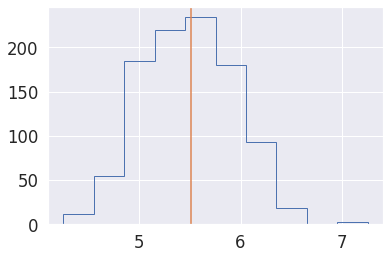

In [ ]:
# create bootstrap distribution of median, repeat 1000 times
bootstrap = pd.DataFrame([{'medianladder': [df['Ladder score'].sample(10, replace=True).median() for i in range(1000)]}])

bootstrap.medianladder.hist(histtype= 'step')

plt.axvline(df['Ladder score'].median(), color = 'C1')

np.median(df['Ladder score'])

In [ ]:
conf_int = np.percentile(df['Ladder score'], [2.5, 97.5])
conf_int

array([3.44317994, 7.49129992])

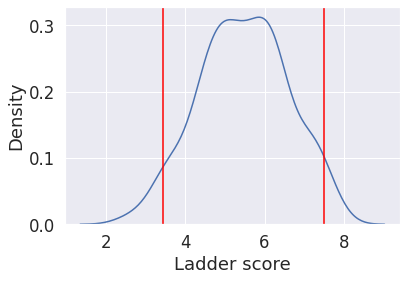

In [ ]:
sns.kdeplot(df['Ladder score'])
for endpoint in conf_int:
    plt.axvline(endpoint, color ='red')

In [ ]:
median_ladder_samples = []
for i in range(1000):
    boot_sample = resample(df['Ladder score'])
    median_ladder_samples.append(boot_sample.median())

np.median(median_ladder_samples)

5.514999866